## 개념 정리
### 용어 정리
- 데이터 전처리: 모델에 주입하기 전에, 훈련데이터를 특정 범위로 묶는 방법 (예시: 표준점수)
- 브로드캐스팅: 크기가 다른 Numpy 배열에서 사칙연산을 모든 행이나 열에 대해 수행하는 것

### 핵심 패키지와 함수 (Pandas)
- train_test_split()
    - 훈련세트와 테스트세트, 그 중에서 입력값과 타겟값을 나누는 함수.
    - 테스트셋을 나누는 비율은 test_size에서 결정되며, 기본적으로 0.25로 설정되어 있다.
    - stratify에 클래스 레이블이 담긴 배열을 전달하면, 그 비율에 맞춰 나눠준다.
- kneighbors()
    - K-최근접 이웃 객체의 메소드.
    - 입력한 데이터에 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인덱스를 반환함.

### 핵심 패키지와 함수 (Numpy)
- column_stack(): 1차원 배열/리스트를 2차원 배열의 열(Column)으로 연결한다. 입력값은 튜플 단위로 줘야 함.
- concatenate(): 차원이 같은 두 배열을 합친다. 입력값은 튜플 단위로 줘야 함.
- np.zeros() : 튜플에 주어진 크기 만큼을 0이나 1을 채운 배열을 생성

In [1]:
'''데이터 입력'''
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [16]:
'''데이터 가공하기'''
import numpy as np

# 데이터 합치기
np.column_stack(([1,2,3],[4,5,6])) #1차원 배열/리스트를 2차원 배열의 열(Column)으로 연결 (입력값은 튜플 단위로 줘야 함)
fish_data = np.column_stack((fish_length,fish_weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 차원이 같은 두 배열을 합침 (입력값은 튜플 단위로 줘야 함)
# np.zeros() : 튜플에 주어진 크기 만큼을 0이나 1을 채운 배열을 생성

# 데이터 분리하기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) # 학습할 데이터와 정답데이터를 입력하면, 학습데이터와 테스트데이터, 그 중에서 input데이터와 target데이터를 분리할 수 있음

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42) # stratify 매개변수에 타깃 데이터를 전달하면, 클래스 비율에 맞춰 데이터를 나눔. 샘플링 편향 문제를 해결할 수 있음
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

[0.]


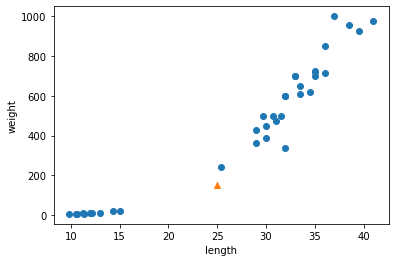

In [24]:

'''학습 진행하고, 결과보기'''
# 학습 진행하기
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(train_input, train_target)
KN.score(test_input, test_target)
print(KN.predict([[25,150]]))

# 학습결과 시각화하기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^') # 특정 좌표를 원하는 마커로 표시함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# predict([[25,150]])을 했을 때, 도미(1)의 결과가 아닌, 빙어(0)의 결과가 나타남
# 시각화 했을 때는 오른쪽 위로 뻗어 있는 도미데이터에 가까움

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


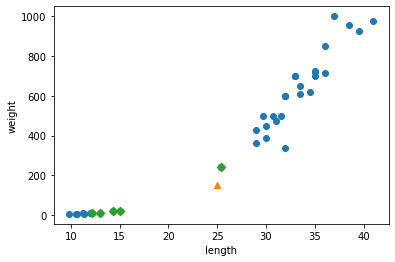

In [28]:
'''가까이 있는 이웃 확인하고, 시각화하기'''
distances, indexes = KN.kneighbors([[25,150]]) # 주어진 샘플에서 가장 가까운 이웃을 찾아줌
print(distances, indexes)

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^') # 특정 좌표를 원하는 하는 마커로 표시함
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 문제점: 가장 가까운 거리와 그 다음 거리에 있는 이웃이, 시각적으로 많은 차이가 나지만, distance값의 차이는 크지 않음 (이웃 알고리즘은 거리로 분류하기 때문에, 거리값이 중요함)
# 데이터 전처리를 통해, Feature를 일정한 값들로 조정할 필요가 있음

In [31]:
'''데이터 정규화 및 시각화'''
# 데이터 정규화: X - 평균 / 표준편차
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean) / std
print(train_scaled)

#  정규화된 데이터를 시각화
import matplotlib.pyplot as plt
scaled_input_data = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(scaled_input_data[0], scaled_input_data[1], marker='^') # 특정 좌표를 원하는 하는 마커로 표시함
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


In [36]:
'''정규화된 데이터 학습시키고, 검증하기'''
# 정규화된 데이터로 학습시키기
KN.fit(train_scaled, train_target)

# 학습한 모델을 테스트셋을 통해 평가하기
# train_set을 통해 구한 평균과 표준편차를 이용하는 이유: 모델이 Train_set을 이용해 학습되기 때문이다.
test_scaled = (test_input - mean) / std
KN.score(test_scaled, test_target)

1.0